## Project Overview
The objective of this project is to explore and analyze how customers sentiment have been changed throughout time. with the use of sentiment analysis algorithms like VADER and BERT

## Table of contents

0. Introduction
    1. Purpose of the project
    2. Main assumptions
1. Installing required packages
2. Dataset
    1. Dataset Collection
    2. Preprocessing
    3. Exploratory Data Analysis (EDA)
3. Lexicon-Based Sentiment Analysis
	1. Vader Sentiment Distribution
	2. Positive wordcloud
	3. Negative wordcloud
	4. Evaluating VADER's prediction
	5. VADER is a VALENCE based Sentiment Analysis Summary
4. Supervised Machine Learning Approach
5. Comparison of Methods
6. Substantial Contribution (Optional)
7. Conclusion

## 0. Introduction
### 0.1. Purpose of the project.
Provide a concise introduction to sentiment analysis of airline customers using lexicon-based (VADER) and supervised learning (BERT) algorithms and compare the results. Include visualizations and summary statistics to understand the distribution of sentiments (positive, negative, neutral).

### 0.2. Main assumptions
- BERT Model is better than VADER.
- How have sentiment emerged, evolved, or declined over time?

In [52]:
# Uncomments the following code to install the necessary packages

# !pip install --upgrade pip
# !pip install skimpy
# !pip install wordcloud
# !pip install pandas numpy matplotlib seaborn scikit-learn vaderSentiment textblob transformers torch


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from skimpy import skim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud #, STOPWORDS

In [3]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chandp20/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chandp20/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Dataset

### 2.1. Dataset Collection

Data Source:
In this sentiment analysis project I used the huggingface [twitter-airline-sentiment](https://huggingface.co/datasets/osanseviero/twitter-airline-sentiment) dataset. \
Download Link: [Twitter Airline Sentiment](https://huggingface.co/datasets/osanseviero/twitter-airline-sentiment)

In [54]:
df = pd.read_csv("hf://datasets/osanseviero/twitter-airline-sentiment/Tweets.csv")

In [5]:
df.shape

(14640, 15)

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 2.2. Processing

In [7]:
df['tweet_created_date'] = pd.to_datetime(df['tweet_created']).dt.date

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,tweet_created_date
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015-02-24
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2015-02-24
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2015-02-24


In [9]:
df['tweet_created_date'].unique()

array([datetime.date(2015, 2, 24), datetime.date(2015, 2, 23),
       datetime.date(2015, 2, 22), datetime.date(2015, 2, 21),
       datetime.date(2015, 2, 20), datetime.date(2015, 2, 19),
       datetime.date(2015, 2, 18), datetime.date(2015, 2, 17),
       datetime.date(2015, 2, 16)], dtype=object)

In [10]:
sentiment_df = df[['airline_sentiment', 'airline','text', 'tweet_created_date']]

In [11]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24


### 2.3. Exploratory Data Analysis (EDA)
- Include visualizations and summary statistics to understand the distribution of sentiments (positive, negative, neutral).

In [42]:
#Summary of the original dataset
skim(sentiment_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14640  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ object      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0       ┃ p25      ┃ p50  ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ vader_score   │   0 │     0 │  0.09401 │  0.4248 │  -0.9792 │  -0.2023 │    0 │  0.4404 │  0.9716 │ ▁▃▃█▅▃ │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴──────────┴──────────┴──────┴─────────┴─────────┴────────┘  │
│                                            <class 'datetime.date'>                                              │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column                         ┃ NA    ┃ NA %     ┃ first             ┃ last              ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ tweet_created_date             │     0 │        0 │ 2015-02-16        │ 2015-02-24        │ None           │  │
│ └────────────────────────────────┴───────┴──────────┴───────────────────┴───────────────────┴────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ airline_s │  0 │    0 │ neutral   │ positive  │ negative  │ positive  │      7.79 │         1 │      14640 │  │
│ │ entiment  │    │      │           │           │           │           │           │           │            │  │
│ │ airline   │  0 │    0 │ Delta     │ Virgin    │ American  │ Virgin    │      7.79 │       1.2 │      18057 │  │
│ │           │    │      │           │ America   │           │ America   │           │           │            │  │
│ │ text      │  0 │    0 │ @united   │ @USAirway │ "LOL you  │ 😳        │       104 │        18 │     260526 │  │
│ │           │    │      │ done      │ s Eyyyy!  │ guys are  │ LOLOLOLOL │           │           │            │  │
│ │           │    │      │           │ Cancelled │ so on it" │ OL        │           │           │            │  │
│ │           │    │      │           │ Flightlat │ - me, had │ “@JetBlue │           │           │            │  │
│ │           │    │      │           │ ions,     │ this 

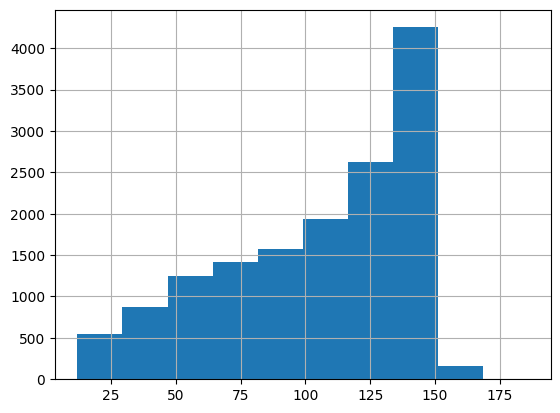

In [43]:
sentiment_df['text'].map(lambda x: len(x)).hist()
plt.show()

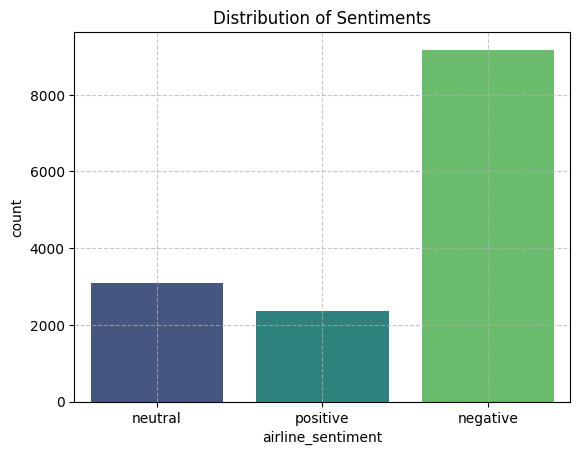

In [44]:
# EDA: Distribution of sentiments
sns.countplot(x='airline_sentiment', data=sentiment_df, palette="viridis")
plt.title('Distribution of Sentiments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

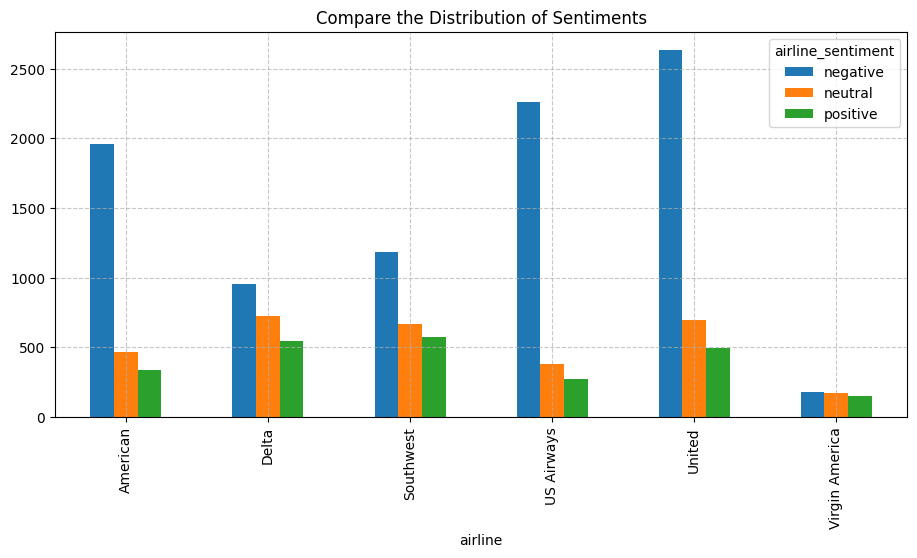

In [45]:
# compare the airlines
sentiment_df.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))
plt.title('Compare the Distribution of Sentiments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows the sentiment distribution (negative, neutral, positive) among various airlines in the Twitter Airline Sentiment dataset:

- **Negative Sentiment (blue)** dominates across all airlines, especially for United and American, which have the highest volume of negative tweets.
- **Neutral Sentiment (orange)** is modest and relatively stable among airlines.
- **Positive Sentiment (green)** is the lowest among all airlines, with Virgin America showing a little higher volume of positive tweets compared to its competitors.

This highlights an ongoing pattern of frustration, that includes significant variations in sentiment intensity among airlines.

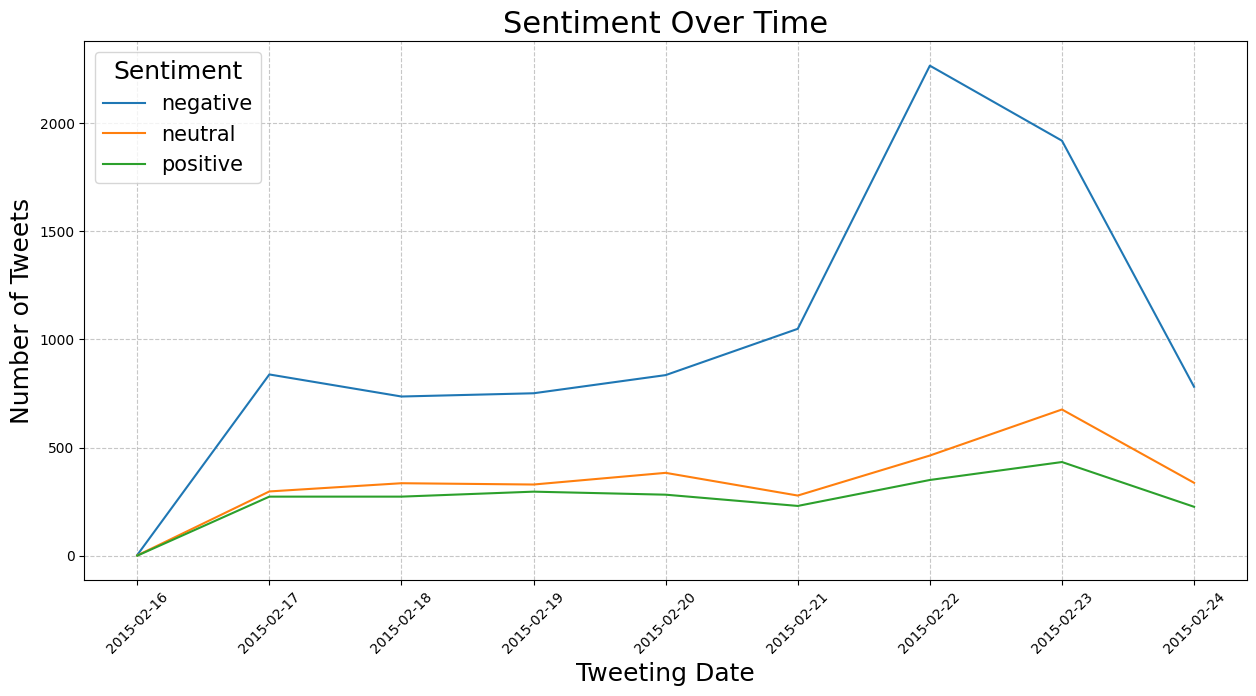

In [46]:
# Group by tweet_created_date and airline_sentiment
sentiment_over_time = sentiment_df.groupby(['tweet_created_date', 'airline_sentiment']).size().unstack().fillna(0)

# Plot the sentiment over time
sentiment_over_time.plot(kind='line', figsize=(15, 7))
plt.title('Sentiment Over Time', fontsize=22)
plt.xlabel('Tweeting Date', fontsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', fontsize=15, title_fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This line chart shows the temporal distribution of sentiment (negative, neutral, positive) within the Twitter Airline Sentiment dataset. Key observations include:  

1. **Negative sentiment** dominates across the period of time, with a significant peak on 2015-02-22, signifying an increase in complaints or dissatisfaction.  
1. **Neutral sentiment** stays rather stable, with a modest increase during the same period.
1. **Positive sentiment** shows minimal activity, with a small increase seen between February 22 and February 23, 2015, however it stays continuously low.

The chart shows an evident tendency towards negative feedback over this timeframe, with significant peaks maybe associated with particular events or situations.

In [47]:
# Function to clean the text
def clean_text(text):
    text = re.sub(r'RT\S+', '', text)  # Remove URLs
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text

In [48]:
# Apply the clean_text function to the 'text' column
# sentiment_df['cleaned_text'] = sentiment_df['text'].apply(clean_text)
sentiment_df.loc[:, 'cleaned_text'] = sentiment_df['text'].apply(clean_text)

In [49]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text,vader_score,vader_senti_predict
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,what said,0.0000,negative
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus you ve added commercials to the experien...,0.0000,negative
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,i didn t today must mean i need to take anoth...,0.0000,negative
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,it s really aggressive to blast obnoxious ent...,-0.3306,negative
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,and it s a really big bad thing about it,-0.5829,negative


In [50]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
sentiment_df.loc[:, 'cleaned_text'] = sentiment_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [51]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text,vader_score,vader_senti_predict
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,said,0.0000,negative
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus added commercials experience tacky,0.0000,negative
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,today must mean need take another trip,0.0000,negative
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,really big bad thing,-0.5829,negative


## 3. Lexicon-Based Sentiment Analysis

Apply the lexicon-based (VADER) method to the dataset to predict customers sentiment.

In [23]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    # To calulate the time it takes the algorithm to compute a VADER score
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [24]:
# sentiment_df['vader_score'] = sentiment_df['cleaned_text'].apply(vader_sentiment)
sentiment_df.loc[:, 'vader_score'] = sentiment_df['cleaned_text'].apply(vader_sentiment)

/var/folders/n8/zv0wkckj2yj0wtbp49j0czh40000gp/T/ipykernel_43510/573129168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df.loc[:, 'vader_score'] = sentiment_df['cleaned_text'].apply(vader_sentiment)


In [25]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text,vader_score
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,said,0.0000
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus added commercials experience tacky,0.0000
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,today must mean need take another trip,0.0000
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,really aggressive blast obnoxious entertainmen...,-0.3306
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,really big bad thing,-0.5829


In [26]:
# assign score categories and logic
def vader_senti_predict(vader_score):
    if ((vader_score >= 0.58)):
        return 'positive'
    elif (vader_score > 0.3) & (vader_score < 0.58):
        return 'neutral'
    else:
        return 'negative'

In [27]:
# Making sure that sentiment_df is not a view
sentiment_df = sentiment_df.copy()
sentiment_df.loc[:, 'vader_senti_predict'] = sentiment_df['vader_score'].apply(vader_senti_predict)

In [28]:
sentiment_df.head()

,airline_sentiment,airline,text,tweet_created_date,cleaned_text,vader_score,vader_senti_predict
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,said,0.0000,negative
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24,plus added commercials experience tacky,0.0000,negative
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,today must mean need take another trip,0.0000,negative
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,really big bad thing,-0.5829,negative


### 3.1. Vader Sentiment Distribution

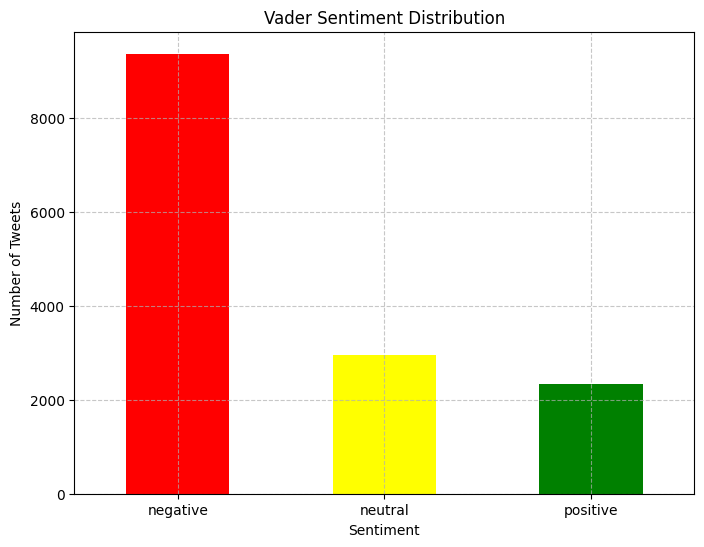

In [29]:
plt.figure(figsize=(8, 6))
sentiment_df.groupby('vader_senti_predict').size().plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Vader Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The bar chart represents the sentiment distribution from the Twitter Airline Sentiment dataset analyzed using VADER. It shows that the majority of tweets (~8,000) are negative, reflecting significant dissatisfaction among customers. \
A smaller portion (~2,000) is neutral, likely representing objective or informational content, while the least (~1,500) are positive, indicating limited public praise for airlines. This highlights a predominantly negative perception of airlines on Twitter.

In [30]:
actual_sentiment_counts = sentiment_df['airline_sentiment'].value_counts()
actual_sentiment_counts

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [31]:
vader_sentiment_counts = sentiment_df['vader_senti_predict'].value_counts()
vader_sentiment_counts

vader_senti_predict
negative    9361
neutral     2950
positive    2329
Name: count, dtype: int64

### 3.2. Positive wordcloud

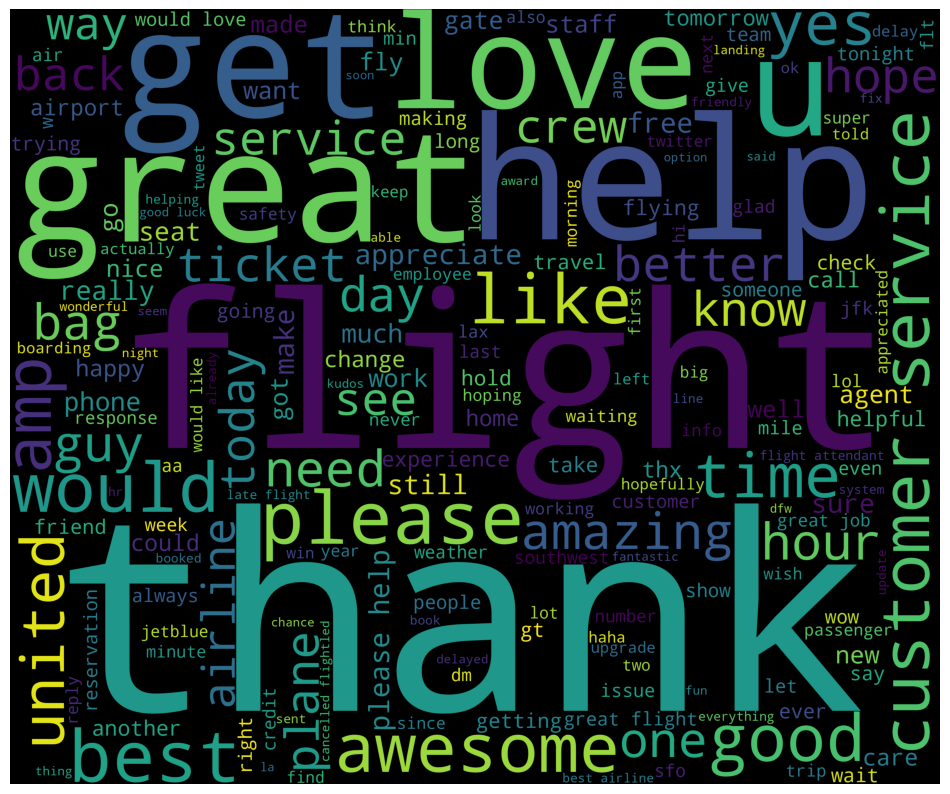

In [35]:
pos_df = sentiment_df[sentiment_df['vader_senti_predict']=='positive']

pos_cleaned_word = ' '.join(pos_df['cleaned_text'])

pos_wordcloud = WordCloud(stopwords=set(stopwords.words('english')),
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(pos_cleaned_word)


plt.figure(1, figsize=(12, 12))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()

### 3.3. Negative wordcloud

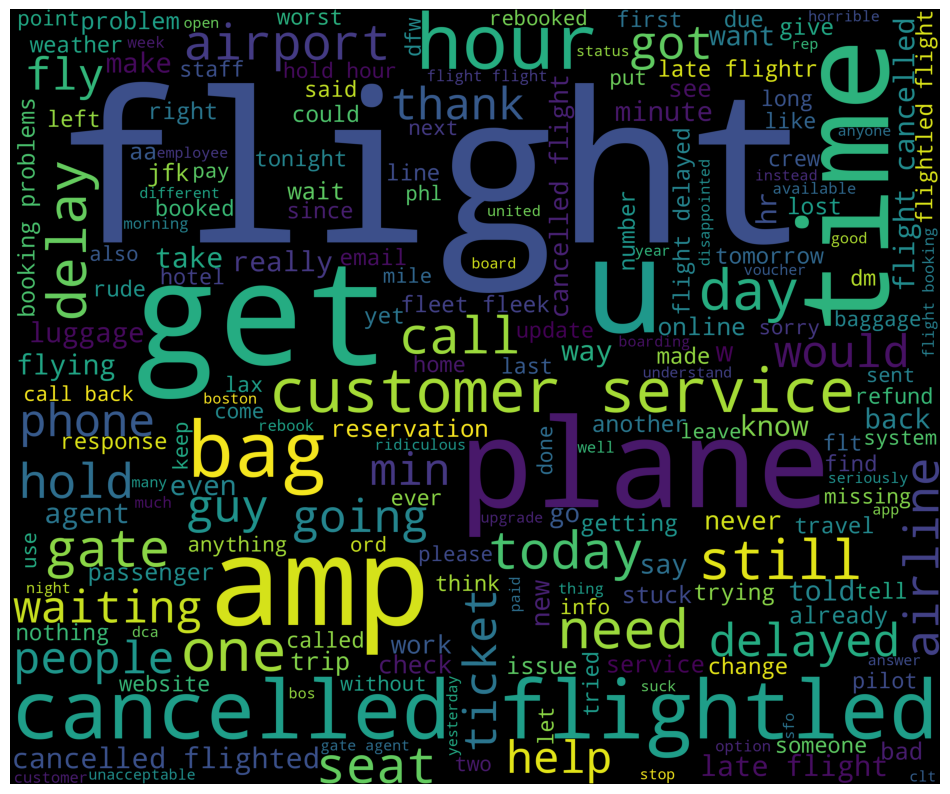

In [36]:
neg_df = sentiment_df[sentiment_df['vader_senti_predict']=='negative']

neg_cleaned_word = ' '.join(neg_df['cleaned_text'])

neg_wordcloud = WordCloud(stopwords=set(stopwords.words('english')),
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(neg_cleaned_word)


plt.figure(1, figsize=(12, 12))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()

### 3.4. Evaluating VADER's prediction

 Compare results to labeled data using metrics like accuracy, precision, recall, and F1-score.

In [37]:
accuracy = accuracy_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'])
precision = precision_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'], average='weighted')
recall = recall_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'], average='weighted')
f1 = f1_score(sentiment_df['airline_sentiment'], sentiment_df['vader_senti_predict'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.60724043715847
Precision: 0.6016320833870709
Recall: 0.60724043715847
F1-score: 0.6043547462415132


**The model's performance on the sentiment prediction task is as follows:**

- **Accuracy**: The model correctly predicted the sentiment in approximately 60.7% of the cases.
- **Precision**: The weighted precision score is 60.2%, meaning that when the model predicted a positive sentiment, 60.2% of those predictions were correct.
- **Recall**: The model's recall score is 60.7%, indicating that it correctly identified 60.7% of the positive sentiments in the data.
- **F1-Score**: The F1-score is 60.4%, which balances precision and recall, suggesting a moderate performance in terms of both identifying positive sentiment and minimizing false positives.

Overall, the model demonstrates a moderate level of accuracy and performance across these metrics.

### 3.5. VADER is a VALENCE based Sentiment Analysis Summary
Based on the sentiment analysis performed using the VADER sentiment analysis tool on the tweets in the dataset, the distribution of sentiments is as follows:

**Sentiment Stats: Actual vs Vader Prediction**
| Sentiment     | Actual Tweets | Vader Predicted Tweets |
|---------------|---------------|-------------------------|
| Positive      | 2363          | 2339                   |
| Negative      | 9178          | 9352                   |
| Neutral       | 3099          | 2949                   |


**Summary:**

- Positive Sentiment: Vader predict 2339 tweets are positive while 2363 actually positive. These tweets express satisfaction, support, or other positive emotions. This indicates that a smaller portion of the tweets reflect positive opinions or sentiments.

- Negative Sentiment: The majority of the tweets 9352, Vader predicted as negative while actuall are 9178. This indicates a significant amount of dissatisfaction, criticism, or other negative emotions expressed by the users. This suggests that the topics discussed in these tweets are largely viewed unfavorably by the users.

- Neutral Sentiment: There are 2949 tweets classified as neutral by Vader but actual 3099 tweets are neutral. These tweets do not express a strong positive or negative sentiment. They might be factual statements, news updates, or other content that does not convey a clear opinion.

Conclusion: 

### **4. Supervised Machine Learning Approach**

- **Algorithm Selection**: Justify the choice of BERT algorithm.

In [75]:
# BERT implementation
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenization and dataset preparation
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

sentiment_df['label'] = sentiment_df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
train_texts, val_texts, train_labels, val_labels = train_test_split(sentiment_df['text'], sentiment_df['label'], test_size=0.2)

train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)

class AirlineDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = AirlineDataset(train_encodings, train_labels.tolist())
val_dataset = AirlineDataset(val_encodings, val_labels.tolist())

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/n8/zv0wkckj2yj0wtbp49j0czh40000gp/T/ipykernel_94016/3459872849.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['label'] = sentiment_df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})


- **Feature Extraction**:
  - Traditional Methods: Use Bag of Words (BoW) or TF-IDF.
  - Advanced Methods: Use word embeddings like Word2Vec, GloVe or BERT.

- **Model Training and Testing**:
  - Train the model on the dataset.
  - Perform hyperparameter tuning using methods like GridSearchCV or RandomizedSearchCV.

In [73]:
# !pip install transformers['torch']
# !pip install 'accelerate>=0.26.0'

In [76]:
# Model training and evaluation code here
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>={ACCELERATE_MIN_VERSION}'`

- **Evaluation**: Report metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [ ]:
# Evaluation code here
predictions = trainer.predict(val_dataset)
preds = predictions.predictions.argmax(-1)

accuracy = accuracy_score(val_labels, preds)
precision = precision_score(val_labels, preds, average='weighted')
recall = recall_score(val_labels, preds, average='weighted')
f1 = f1_score(val_labels, preds, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

### **5. Comparison of Methods**

- **Performance Analysis**:
  - Compare the lexicon-based approach with the supervised machine learning model.
  - Discuss strengths and weaknesses of each method.

- **Error Analysis**: Identify and analyze misclassified samples.

### Draft: Overall Comparison of Sentiment Analysis Summary using both methods

Both VADER and BERTTopic sentiment analysis tools show a predominance of negative sentiment in the tweets. However, BERTTopic identifies a slightly higher number of positive tweets compared to VADER. The neutral sentiment count is also higher in BERTTopic's analysis. This comparison suggests that while both tools agree on the overall negative sentiment trend, BERTTopic might be slightly more sensitive to positive and neutral sentiments.


In the tweets datset there was no target classs label. To get better result we could further explore using clustering and/or topic modeling methods. The cluster and topic modeling could help to identify the main themes in the dataset, and sentiment analysis can reveal how people feel about each theme of the tweets.

### **6. Substantial Contribution (Optional)**

- **Hybrid Approach**: Combine lexicon-based features with supervised learning features.
- **Domain Adaptation**: Test performance on data from a different domain.
- **Real-Time Sentiment Analysis**: Build a demo application for sentiment analysis using Streamlit or Flask.

### **7. Report Submission**

- Use a **Jupyter Notebook**:
  - Include well-structured markdown cells for explanations and visualizations.
  - Ensure that the code is clean, modular, and reproducible.

- **Documentation**:
  - Provide clear instructions for running the code.
  - Include references for datasets and libraries.